## Retail Strategy and Analytics


#### import the needed libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


#### Load the Data and run  High-Level Data Checks and Summaries

In [74]:
df_purchase = pd.read_csv('purchase_behaviour.csv')
df_transaction = pd.read_excel('transaction_data.xlsx')

Exploratory data analysis

The first step in any analysis is to first understand the data. 
Let’s take a look at each of the datasets provided.

Examining transaction data
We can use str() to look at the format of each column and see a sample of the data.
As we have read in
the dataset as a data.table , we can use.describe () to see a sample of the
data or use head(transactionData) to look at the first 10 rows.
Let’s check if columns we would expect to be numeric are in numeric form and date columns are in date
format.

In [98]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [35]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [36]:
df_transaction.describe ()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [37]:
print(str(df_transaction))

                                DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
0      1970-01-01 00:00:00.000043390          1            1000       1   
1      1970-01-01 00:00:00.000043599          1            1307     348   
2      1970-01-01 00:00:00.000043605          1            1343     383   
3      1970-01-01 00:00:00.000043329          2            2373     974   
4      1970-01-01 00:00:00.000043330          2            2426    1038   
...                              ...        ...             ...     ...   
264831 1970-01-01 00:00:00.000043533        272          272319  270088   
264832 1970-01-01 00:00:00.000043325        272          272358  270154   
264833 1970-01-01 00:00:00.000043410        272          272379  270187   
264834 1970-01-01 00:00:00.000043461        272          272379  270188   
264835 1970-01-01 00:00:00.000043365        272          272380  270189   

        PROD_NBR                                 PROD_NAME  PROD_QTY  \
0              5    Natural

###### Derive Extra Features by Create new columns for pack size and brand name from the product name.


In [3]:
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract(r'(\d+)')
df_transaction['PACK_SIZE'] = pd.to_numeric(df_transaction['PACK_SIZE'])


In [9]:
df_transaction['BRAND_NAME'] = df_transaction['PROD_NAME'].apply(lambda x: x.split()[0])

In [40]:
prod_name_counts = df_transaction['PROD_NAME'].value_counts()

print(prod_name_counts)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64


the infomation above shows that customers purchased a lot of chips but how can we check to be sure that these are all chips? lets do some basic text analysis by summarising the individual words in the product name.

In [77]:
# Counting the occurrences of each word
word_counts = productWords['words'].value_counts().reset_index()

# Renaming the columns
word_counts.columns = ['words', 'N']

# Sorting by frequency in descending order
word_counts_sorted = word_counts.sort_values(by='N', ascending=False)

print(word_counts_sorted)

           words  N
0        Natural  1
151      Chicken  1
140          Dip  1
141       Compny  1
142  SeaSalt175g  1
..           ... ..
76         Aioli  1
77          Slow  1
78           Rst  1
79          Pork  1
219    Bolognese  1

[220 rows x 2 columns]


In [79]:
# Splitting PROD_NAME into individual words
product_words = df_transaction['PROD_NAME'].str.split(expand=True).stack()

# Creating a DataFrame with the words
product_words_df = pd.DataFrame({'words': product_words})

# Counting the occurrences of each word
word_counts = product_words_df['words'].value_counts()

# Displaying the top 20 most common words
print(word_counts.head(20))

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
134g        25102
Doritos     24962
Crinkle     23960
110g        22387
Corn        22063
Original    21560
Cut         20754
Chip        18645
170g        18502
Salsa       18094
Chicken     15407
Name: words, dtype: int64


since we are only interested in words that will tell us if the product is chips or not, let’s remove all words with
digits and special characters such as ‘&’ from our set of product words. We can do this using grepl().

In [80]:
# Removing words with digits or special characters
filtered_word_counts = word_counts[~word_counts.index.str.contains('\d|&')]

# Displaying the top 20 most common filtered words
print(filtered_word_counts.head(20))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22063
Original    21560
Cut         20754
Chip        18645
Salsa       18094
Chicken     15407
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
Vinegar     12402
Chilli      12389
Name: words, dtype: int64


In [81]:
# Filter rows containing "salsa" in the "PROD_NAME" column
df_transaction = df_transaction[~df_transaction['PROD_NAME'].str.lower().str.contains("salsa")]

# Drop the "SALSA" column if it exists
df_transaction = df_transaction.drop(columns=['SALSA'], errors='ignore')

print(df_transaction)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

Next, lets summarize() to check summary statistics such as mean, min and max values for each
feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns
(NA's : number of nulls will appear in the output if there are any nulls).

In [82]:
# Summary of the data
print(df_transaction.describe())

# Checking for nulls
print(df_transaction.info())

                DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  246742.000000  246742.000000    2.467420e+05  2.467420e+05   
mean    43464.054875     135.051098    1.355310e+05  1.351311e+05   
std       105.396691      76.787096    8.071528e+04  7.814772e+04   
min     43282.000000       1.000000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.000000    7.001500e+04  6.756925e+04   
50%     43464.000000     130.000000    1.303670e+05  1.351830e+05   
75%     43555.000000     203.000000    2.030840e+05  2.026538e+05   
max     43646.000000     272.000000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  246742.000000  246742.000000  246742.000000  
mean       56.351789       1.908062       7.321322  
std        33.695428       0.659831       3.077828  
min         1.000000       1.000000       1.700000  
25%        26.000000       2.000000       5.800000  
50%        53.000000       2.000000       7.400000  
75%    

There are no null values in the columns but product quantity appears to have an outlier.
Let’s investigate further the case where 200 packets of chips are bought in one transaction.

In [87]:
# Filter the dataset to find rows where PROD_QTY is equal to 200
outliers = df_transaction[df_transaction['PROD_QTY'] == 200]

print(outliers)

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762  43331        226          226000  226201         4   
69763  43605        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


we can see that there are two transactions where 200 packets of chips are bought in one transaction and both of these
transactions where by the same customer.

It looks like this customer has only had this two transactions over the year and is not an ordinary retail customer.The customer might be buying chips for commercial purposes instead.so because we are trying to remove outlier We’ll remove this customer (we can remove the customers loyalty
card number from further analysis.)

In [94]:
# Remove the outlier from the loyalty card column
df_transaction = df_transaction[df_transaction['LYLTY_CARD_NBR'] != 226000]

# Display summary statistics
print(df_transaction.describe())

# Display info to check for nulls
print(df_transaction.info())

                DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  246740.000000  246740.000000    2.467400e+05  2.467400e+05   
mean    43464.054843     135.050361    1.355303e+05  1.351304e+05   
std       105.396396      76.786971    8.071520e+04  7.814760e+04   
min     43282.000000       1.000000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.000000    7.001500e+04  6.756875e+04   
50%     43464.000000     130.000000    1.303670e+05  1.351815e+05   
75%     43555.000000     203.000000    2.030832e+05  2.026522e+05   
max     43646.000000     272.000000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  246740.000000  246740.000000  246740.000000  
mean       56.352213       1.906456       7.316113  
std        33.695235       0.342499       2.474897  
min         1.000000       1.000000       1.700000  
25%        26.000000       2.000000       5.800000  
50%        53.000000       2.000000       7.400000  
75%    

In [95]:
# Grouping by 'DATE' and counting the number of transactions
transactions_by_date = df_transaction.groupby('DATE').size().reset_index(name='Transaction_Count')

print(transactions_by_date)

      DATE  Transaction_Count
0    43282                663
1    43283                650
2    43284                674
3    43285                669
4    43286                660
..     ...                ...
359  43642                657
360  43643                669
361  43644                673
362  43645                703
363  43646                704

[364 rows x 2 columns]


In [97]:
# Convert the 'DATE' column in transactions_by_date to datetime64[ns]
transactions_by_date['DATE'] = pd.to_datetime(transactions_by_date['DATE'])

# Merge allDates with transactions_by_date
transactions_by_day = pd.merge(all_dates, transactions_by_date, on='DATE', how='left')

print(transactions_by_day)

          DATE  Transaction_Count
0   2018-07-01                NaN
1   2018-07-02                NaN
2   2018-07-03                NaN
3   2018-07-04                NaN
4   2018-07-05                NaN
..         ...                ...
360 2019-06-26                NaN
361 2019-06-27                NaN
362 2019-06-28                NaN
363 2019-06-29                NaN
364 2019-06-30                NaN

[365 rows x 2 columns]


###### Define Metrics of Interest to  analyze customer spending behavior, such as total spending per customer, average spending per transaction, etc.
 

In [10]:
# Total spending per customer
total_spending = df_transaction.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()

# Average spending per transaction
avg_spending = df_transaction.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean()

# Number of transactions per customer
num_transactions = df_transaction.groupby('LYLTY_CARD_NBR').size()

# Combine metrics into a new dataframe
customer_metrics = pd.DataFrame({
    'Total_Spending': total_spending,
    'Average_Spending': avg_spending,
    'Num_Transactions': num_transactions
}).reset_index()

# Merge with purchase behavior data to get segment information
merged_data = pd.merge(customer_metrics, df_purchase, on='LYLTY_CARD_NBR', how='left')

# Display the merged dataframe
print("Merged Data:")
print(merged_data.head())

Merged Data:
   LYLTY_CARD_NBR  Total_Spending  Average_Spending  Num_Transactions  \
0            1000             6.0               6.0                 1   
1            1002             2.7               2.7                 1   
2            1003             6.6               3.3                 2   
3            1004             1.9               1.9                 1   
4            1005             2.8               2.8                 1   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1   YOUNG SINGLES/COUPLES       Mainstream  
2          YOUNG FAMILIES           Budget  
3   OLDER SINGLES/COUPLES       Mainstream  
4  MIDAGE SINGLES/COUPLES       Mainstream  


Text(0.5, 1.0, 'Distribution of Total Sales')

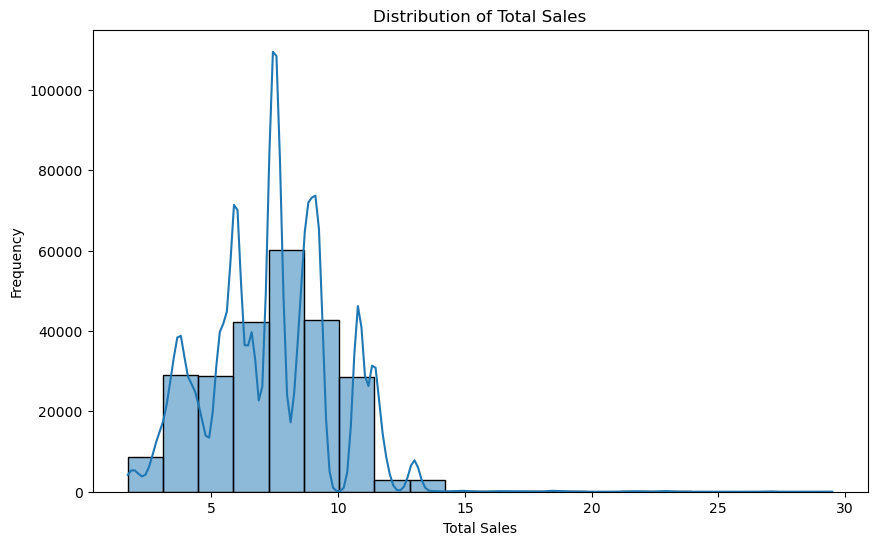

In [101]:
# Histogram of Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_transaction['TOT_SALES'], bins=20, kde=True)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')


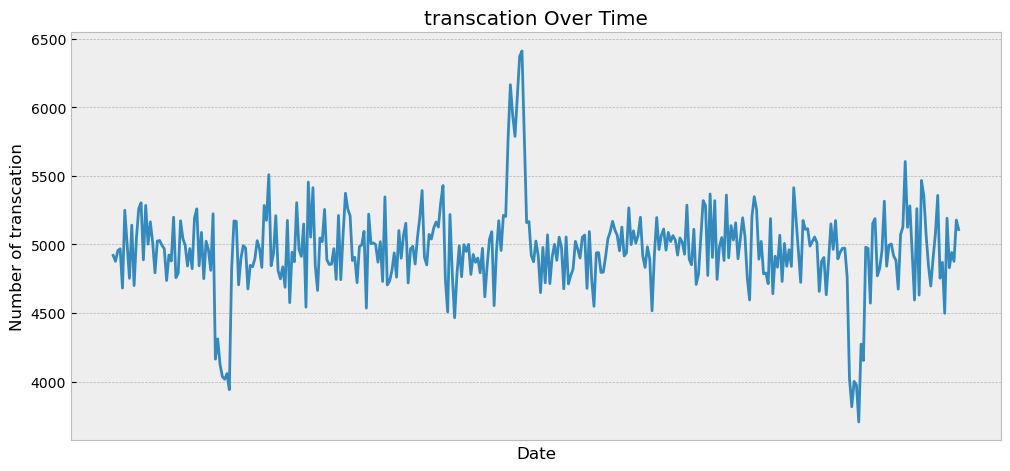

In [139]:
# Convert DATE column to datetime
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'])

# Group by date and calculate total sales
total_sales_time = df_transaction.groupby('DATE')['TOT_SALES'].sum()

# Plot time series
plt.figure(figsize=(12, 6))
total_sales_time.plot()
plt.xlabel('Date')
plt.ylabel('Number of transcation')
plt.title('transcation Over Time')
plt.show()

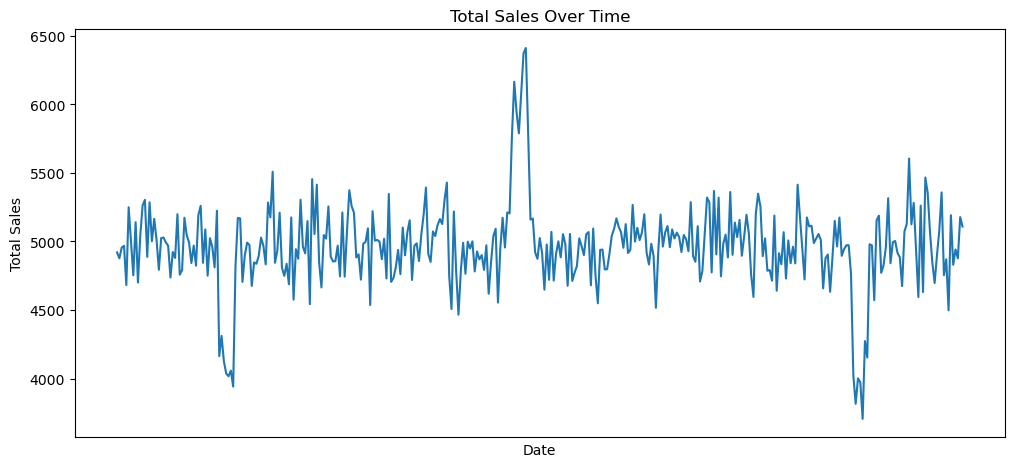

In [104]:
# Convert DATE column to datetime
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'])

# Group by date and calculate total sales
total_sales_time = df_transaction.groupby('DATE')['TOT_SALES'].sum()

# Plot time series
plt.figure(figsize=(12, 6))
total_sales_time.plot()
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.show()

In [140]:
# Extracting digits from PROD_NAME to get PACK_SIZE
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract('(\d+)')

# Convert PACK_SIZE column to numeric
df_transaction['PACK_SIZE'] = pd.to_numeric(df_transaction['PACK_SIZE'])

# Display the dataframe with PACK_SIZE column
print(df_transaction.head())

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  
0    Natural Chip        Compny SeaSalt175g         2        6.0        175  
1                  CCs Nacho Cheese    175g         3        6.3        175  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150  


 Now Let's plot a histogram of PACK_SIZE since we know that it is a categorical
 variable and not a continuous variable even though it is numeric.


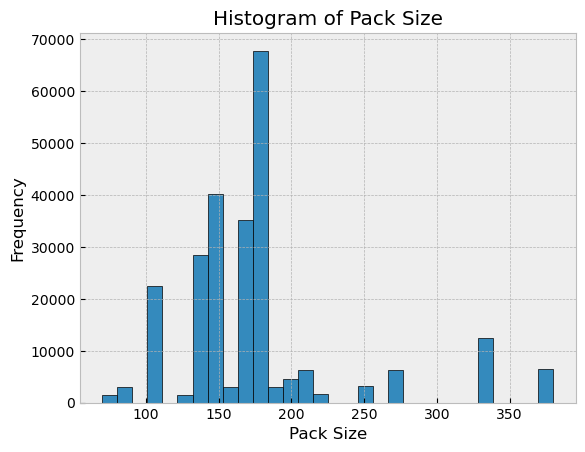

In [143]:
# Plot histogram of PACK_SIZE
plt.hist(df_transaction['PACK_SIZE'], bins=30, edgecolor='black')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Histogram of Pack Size')
plt.show()

Now lets look at the product brand 

In [144]:
# Extracting brand from PROD_NAME column
df_transaction['BRAND'] = df_transaction['PROD_NAME'].str.split().str[0].str.upper()

# Displaying the first few rows to verify
print(df_transaction.head())

                           DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 1970-01-01 00:00:00.000043390          1            1000       1         5   
1 1970-01-01 00:00:00.000043599          1            1307     348        66   
2 1970-01-01 00:00:00.000043605          1            1343     383        61   
3 1970-01-01 00:00:00.000043329          2            2373     974        69   
4 1970-01-01 00:00:00.000043330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

     BRAND  
0  NATURAL  
1      CCS  
2   S

In [145]:
# Checking brands
brand_counts = df_transaction['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'COUNT']
brand_counts = brand_counts.sort_values(by='COUNT', ascending=False)

# Displaying the result
print(brand_counts)

         BRAND  COUNT
0       KETTLE  41288
1       SMITHS  27390
2     PRINGLES  25102
3      DORITOS  22041
4        THINS  14075
5          RRD  11894
6    INFUZIONS  11057
7           WW  10320
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11    TYRRELLS   6442
12       GRAIN   6272
13     NATURAL   6050
14    CHEEZELS   4603
15         CCS   4551
16         RED   4427
17      DORITO   3183
18      INFZNS   3144
19       SMITH   2963
20     CHEETOS   2927
21       SNBTS   1576
22      BURGER   1564
23  WOOLWORTHS   1516
24     GRNWVES   1468
25    SUNBITES   1432
26         NCC   1419
27      FRENCH   1418


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red
Rock Deli chips. Let’s combine these together to get a better insight.

In [ ]:
# Clean brand names
brand_mapping = {
    "RED": "RRD",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}

df_transaction['BRAND'] = df_transaction['BRAND'].replace(brand_mapping)

# Check again
brand_counts = df_transaction['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'COUNT']
brand_counts = brand_counts.sort_values(by='BRAND')

# Displaying the result
print(brand_counts)

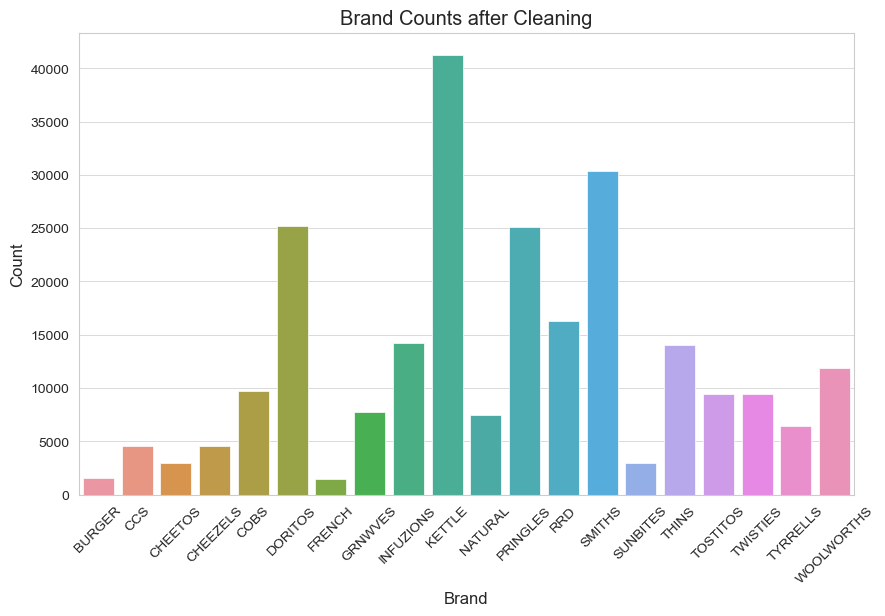

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Plotting the brand counts
plt.figure(figsize=(10, 6))
sns.barplot(x='BRAND', y='COUNT', data=brand_counts)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Counts after Cleaning')
plt.xticks(rotation=45)
plt.show()

Now that we are done with the brand let’s have a look at the second dataset.

In [170]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [159]:
df_purchase['PREMIUM_CUSTOMER']

0           Premium
1        Mainstream
2            Budget
3        Mainstream
4        Mainstream
            ...    
72632    Mainstream
72633    Mainstream
72634       Premium
72635        Budget
72636    Mainstream
Name: PREMIUM_CUSTOMER, Length: 72637, dtype: object

In [169]:
# Count the occurrences of each premium_customer
premium_customer_counts = df_purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()
premium_customer_counts.columns = ['PREMIUM_CUSTOMER', 'COUNT']

# Sort the values by count in descending order
premium_customer_counts = premium_customer_counts.sort_values(by='COUNT', ascending=False)

# Display the result
print(premium_customer_counts)

  PREMIUM_CUSTOMER  COUNT
0       Mainstream  29245
1           Budget  24470
2          Premium  18922


In [167]:
# Count the occurrences of each lifestage
lifestage_counts = df_purchase['LIFESTAGE'].value_counts().reset_index()
lifestage_counts.columns = ['LIFESTAGE', 'COUNT']

# Sort the values by count in descending order
lifestage_counts = lifestage_counts.sort_values(by='COUNT', ascending=False)

# Display the result
print(lifestage_counts)

                LIFESTAGE  COUNT
0                RETIREES  14805
1   OLDER SINGLES/COUPLES  14609
2   YOUNG SINGLES/COUPLES  14441
3          OLDER FAMILIES   9780
4          YOUNG FAMILIES   9178
5  MIDAGE SINGLES/COUPLES   7275
6            NEW FAMILIES   2549


In [174]:
# Group by 'PREMIUM_CUSTOMER' and count the occurrences
premium_customer_counts = df_purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()

# Rename the columns
premium_customer_counts.columns = ['PREMIUM_CUSTOMER', 'COUNT']

# Sort the DataFrame by 'PREMIUM_CUSTOMER' in descending order
premium_customer_counts = premium_customer_counts.sort_values(by='PREMIUM_CUSTOMER', ascending=False)

# Display the result
print(premium_customer_counts)

  PREMIUM_CUSTOMER  COUNT
2          Premium  18922
0       Mainstream  29245
1           Budget  24470


Seems there are no issues with the customer data, we can now go ahead and join the transaction
and customer data sets together

In [207]:
# Concatenate df_transaction and df_purchase along the columns
data = pd.concat([df_transaction, df_purchase], axis=1)

# Drop the duplicate column
data = data.loc[:, ~data.columns.duplicated()]

print(data)


                               DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  \
0     1970-01-01 00:00:00.000043390        1.0          1000.0     1.0   
1     1970-01-01 00:00:00.000043599        1.0          1307.0   348.0   
2     1970-01-01 00:00:00.000043605        1.0          1343.0   383.0   
3     1970-01-01 00:00:00.000043329        2.0          2373.0   974.0   
4     1970-01-01 00:00:00.000043330        2.0          2426.0  1038.0   
...                             ...        ...             ...     ...   
72590                           NaT        NaN             NaN     NaN   
72595                           NaT        NaN             NaN     NaN   
72616                           NaT        NaN             NaN     NaN   
72623                           NaT        NaN             NaN     NaN   
72630                           NaT        NaN             NaN     NaN   

       PROD_NBR                                 PROD_NAME  PROD_QTY  \
0           5.0    Natural Chip        C

In [208]:
data.dropna()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1970-01-01 00:00:00.000043390,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1970-01-01 00:00:00.000043599,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0,CCS,YOUNG SINGLES/COUPLES,Mainstream
2,1970-01-01 00:00:00.000043605,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0,SMITHS,YOUNG FAMILIES,Budget
3,1970-01-01 00:00:00.000043329,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175.0,SMITHS,OLDER SINGLES/COUPLES,Mainstream
4,1970-01-01 00:00:00.000043330,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
72632,1970-01-01 00:00:00.000043510,70.0,70138.0,68293.0,72.0,WW Crinkle Cut Original 175g,2.0,3.4,175.0,WOOLWORTHS,MIDAGE SINGLES/COUPLES,Mainstream
72633,1970-01-01 00:00:00.000043512,70.0,70138.0,68294.0,37.0,Smiths Thinly Swt Chli&S/Cream175G,2.0,6.0,175.0,SMITHS,YOUNG FAMILIES,Mainstream
72634,1970-01-01 00:00:00.000043520,70.0,70138.0,68295.0,49.0,Infuzions SourCream&Herbs Veg Strws 110g,2.0,7.6,110.0,INFUZIONS,YOUNG FAMILIES,Premium
72635,1970-01-01 00:00:00.000043550,70.0,70138.0,68296.0,47.0,Doritos Corn Chips Original 170g,2.0,8.8,170.0,DORITOS,OLDER FAMILIES,Budget


Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
• Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is
• How many customers are in each segment
• How many chips are bought per customer by segment
• What’s the average chip price by customer segmen

Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.


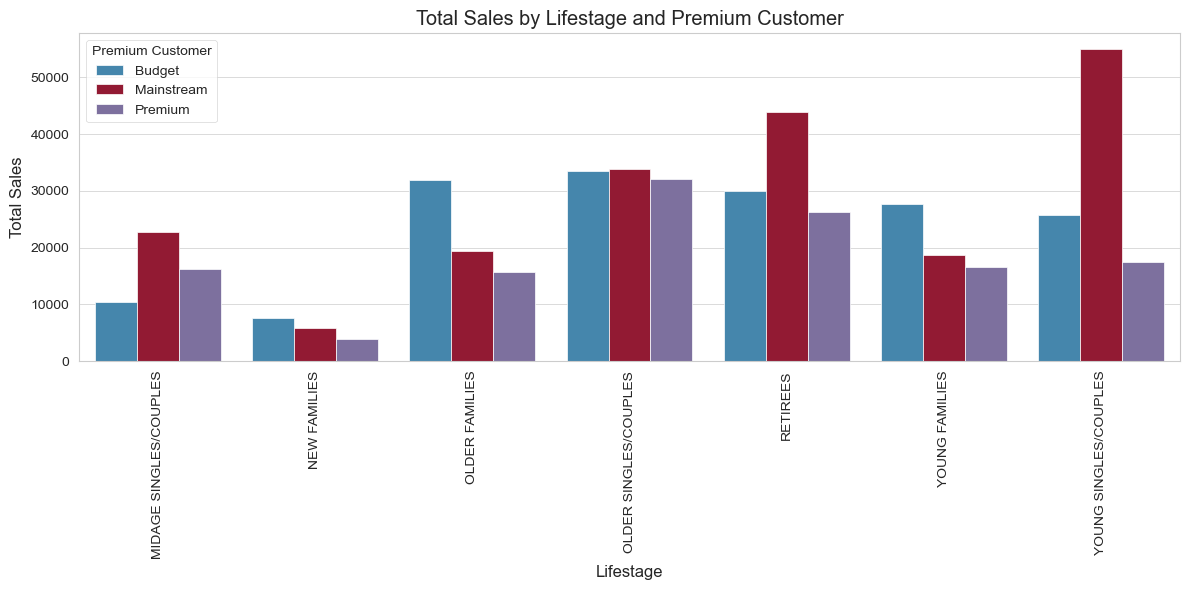

In [205]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=sales, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=90)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees
Let’s see if the higher sales are due to there being more customers who buy chips.

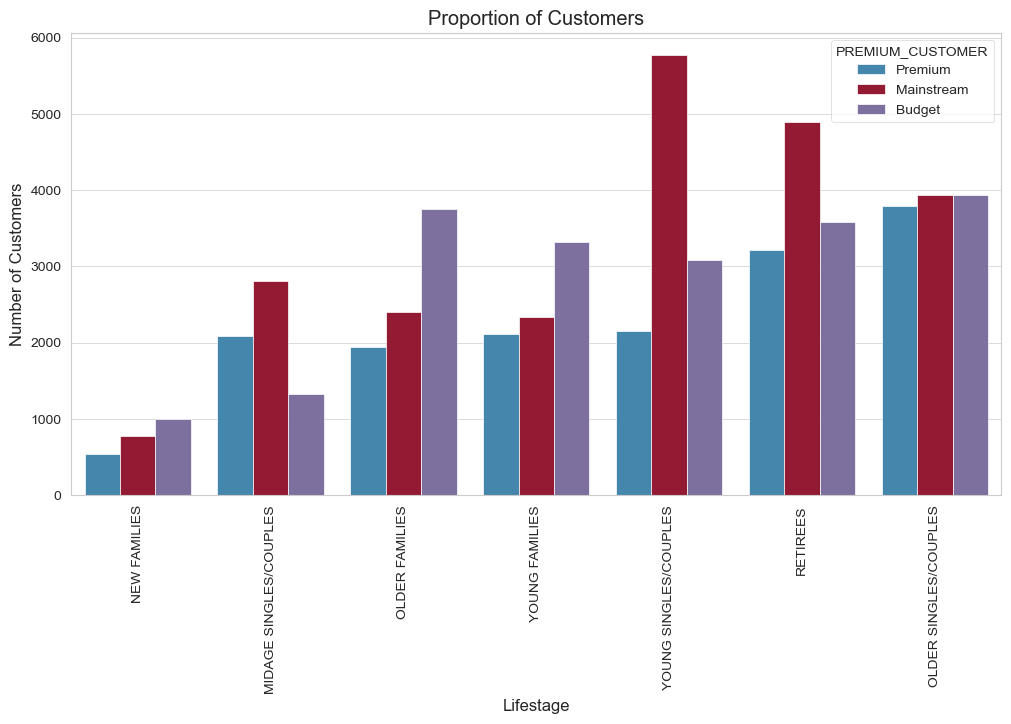

In [214]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index().sort_values(by='LYLTY_CARD_NBR', ascending=True)

# Create the plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=customers, x='LIFESTAGE', y='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.title('Proportion of Customers')
plt.xticks(rotation=90)
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget

Next lets find out if higher sales may also be driven by more units of chips being bought per customer.

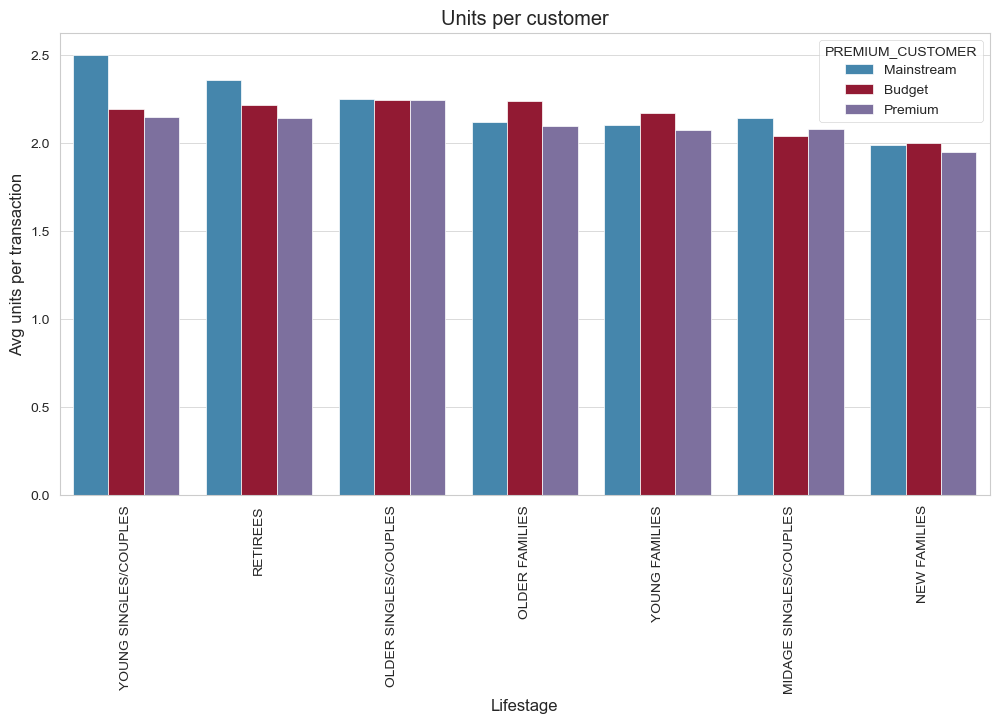

In [219]:
# Calculate average units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()).reset_index(name='AVG')
avg_units = avg_units.sort_values(by='AVG', ascending=False)

# Create plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER', dodge=True)
plt.xlabel('Lifestage')
plt.ylabel('Avg units per transaction')
plt.title('Units per customer')
plt.xticks(rotation=90)
plt.show()

From the graph we see that older families and young families in general buy more chips per customer
 Now let’s also investigate the average price per unit chips bought for each customer segment as this is also a
driver of total sales

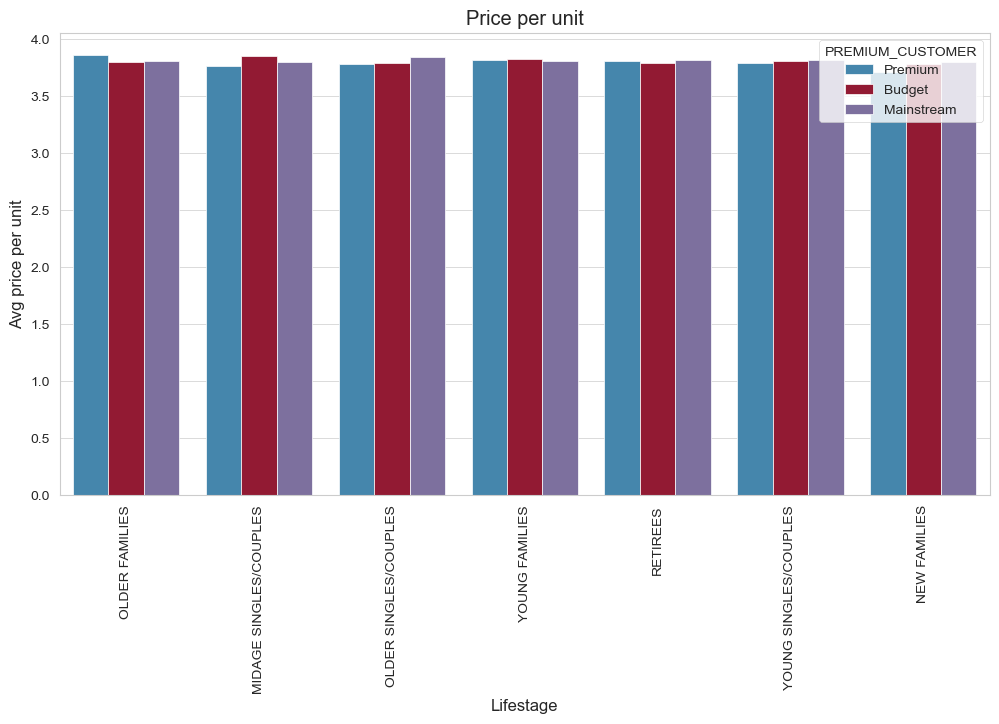

In [221]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index(name='AVG')

# Sort values by 'AVG'
avg_price = avg_price.sort_values(by='AVG', ascending=False)

# Create plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER', dodge=True)
plt.xlabel('Lifestage')
plt.ylabel('Avg price per unit')
plt.title('Price per unit')
plt.xticks(rotation=90)
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own
consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts even though the differece in price is not much.


In [227]:
# Filter the data for Mainstream young singles/couples and other segments
segment1 = data[(data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream")]
other = data[~((data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (data['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Calculate quantity for segment 1 and other
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Calculate brand proportions for segment 1 and other
quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum() / quantity_segment1
quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum() / quantity_other

# Merge the two dataframes and calculate affinity to brand
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, left_index=True, right_index=True, suffixes=('_segment1', '_other'))
brand_proportions['affinityToBrand'] = brand_proportions['PROD_QTY_segment1'] / brand_proportions['PROD_QTY_other']

# Sort by affinity to brand
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=True)

# Print the brand proportions
print(brand_proportions)

            PROD_QTY_segment1  PROD_QTY_other  affinityToBrand
BRAND                                                         
INFUZIONS            0.051577        0.057843         0.891671
TOSTITOS             0.034939        0.038664         0.903655
TYRRELLS             0.023847        0.026216         0.909640
SUNBITES             0.011092        0.012132         0.914244
FRENCH               0.005199        0.005632         0.923189
COBS                 0.036603        0.039570         0.925016
THINS                0.054073        0.057348         0.942896
BURGER               0.006031        0.006323         0.953891
DORITOS              0.100104        0.102828         0.973507
KETTLE               0.166516        0.168099         0.990583
PRINGLES             0.101976        0.102085         0.998932
GRNWVES              0.031473        0.031300         1.005531
CHEEZELS             0.018787        0.018589         1.010654
SMITHS               0.126516        0.122281         1

We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are % less likely to purchase Burger Rings compared to the rest
of the population
Let’s also find out if our target segment tends to buy larger packs of chips.

In [230]:
# Calculate quantity by pack size for segment 1 and other
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum() / quantity_segment1
quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum() / quantity_other

# Merge the two dataframes and calculate affinity to pack size
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, left_index=True, right_index=True, suffixes=('_segment1', '_other'))
pack_proportions['affinityToPack'] = pack_proportions['PROD_QTY_segment1'] / pack_proportions['PROD_QTY_other']

# Sort by affinity to pack size
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

# Print the pack proportions
print(pack_proportions)

           PROD_QTY_segment1  PROD_QTY_other  affinityToPack
PACK_SIZE                                                   
270.0               0.030087        0.025473        1.181122
190.0               0.013795        0.012005        1.149139
200.0               0.019896        0.017848        1.114778
125.0               0.006239        0.005790        1.077613
250.0               0.013588        0.012880        1.054922
135.0               0.013865        0.013185        1.051563
165.0               0.063224        0.061712        1.024496
210.0               0.025858        0.025416        1.017389
175.0               0.272444        0.268737        1.013794
134.0               0.101976        0.102085        0.998932
150.0               0.162496        0.162987        0.996983
170.0               0.080485        0.080985        0.993831
330.0               0.050052        0.051049        0.980470
180.0               0.005615        0.005884        0.954308
220.0               0.00

It looks like Mainstream young singles/couples are more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell 

In [231]:
# Filter the DataFrame for rows where PACK_SIZE is 270 and then get unique PROD_NAME values
unique_prod_names = data[data['PACK_SIZE'] == 270]['PROD_NAME'].unique()

# Print the unique product names
print(unique_prod_names)

['Twisties Cheese     270g' 'Twisties Chicken270g']


Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

#### Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.